Name: Achieng Kuir

CS/MATH:215

Prof. Wirfs-Brock

Date: May 11, 2025

#Recipe 1: How to Clean and Merge Datasets using 'pd.merge()'

**What This Does**

This recipe shows how to clean up long column names and merge two real-world datasets. one with life expectancy data and one with GDP per capita data, using pandas.





In [1]:
#Importing necessay packages
import pandas as pd
import numpy as np

In [2]:
#Loading the dataset
from google.colab import files
uploaded = files.upload()

Saving life-expectancy.csv to life-expectancy.csv


In [3]:
df = pd.read_csv('life-expectancy.csv')


In [4]:
df.head()

,Entity,Code,Year,Period life expectancy at birth - Sex: total - Age: 0
0,Afghanistan,AFG,1950,28.1563
1,Afghanistan,AFG,1951,28.5836
2,Afghanistan,AFG,1952,29.0138
3,Afghanistan,AFG,1953,29.4521
4,Afghanistan,AFG,1954,29.6975


In [5]:
# Rename the long column to something simpler
df = df.rename(columns={
    "Period life expectancy at birth - Sex: total - Age: 0": 'life_expectancy'
})

In [6]:
print(df.head())

        Entity Code  Year  life_expectancy
0  Afghanistan  AFG  1950          28.1563
1  Afghanistan  AFG  1951          28.5836
2  Afghanistan  AFG  1952          29.0138
3  Afghanistan  AFG  1953          29.4521
4  Afghanistan  AFG  1954          29.6975


In [7]:
from google import colab
uploaded = colab.files.upload()

Saving gdp-per-capita-worldbank.csv to gdp-per-capita-worldbank.csv


In [8]:
df_gdp = pd.read_csv('gdp-per-capita-worldbank.csv')

In [9]:
df_gdp.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2021 international $)"
0,Afghanistan,AFG,2000,1617.8264
1,Afghanistan,AFG,2001,1454.1108
2,Afghanistan,AFG,2002,1774.3087
3,Afghanistan,AFG,2003,1815.9282
4,Afghanistan,AFG,2004,1776.9182


In [10]:
# Rename the long column to something simpler
df_gdp = df_gdp.rename(columns={
    'GDP per capita, PPP (constant 2021 international $)': 'GDP_per_capita'
})

In [11]:
print(df_gdp.head())

        Entity Code  Year  GDP_per_capita
0  Afghanistan  AFG  2000       1617.8264
1  Afghanistan  AFG  2001       1454.1108
2  Afghanistan  AFG  2002       1774.3087
3  Afghanistan  AFG  2003       1815.9282
4  Afghanistan  AFG  2004       1776.9182


In [12]:
# Merge both datasets on Entity and Year
merged_df = pd.merge(df, df_gdp[['Entity', 'Year', 'GDP_per_capita']], on=['Entity', 'Year'], how='inner')

In [13]:
merged_df.head()

,Entity,Code,Year,life_expectancy,GDP_per_capita
0,Afghanistan,AFG,2000,55.0047,1617.8264
1,Afghanistan,AFG,2001,55.5113,1454.1108
2,Afghanistan,AFG,2002,56.2251,1774.3087
3,Afghanistan,AFG,2003,57.1713,1815.9282
4,Afghanistan,AFG,2004,57.8098,1776.9182


**How It Works**

1. We start by loading each dataset using pd.read_csv().

2. Long column names are renamed for ease of use with .rename(columns={...}).

3. We then use pd.merge() to join the datasets on shared keys: Entity and Year.

4. We only keep the relevant columns from the GDP dataset to avoid duplication.

5. The how="inner" option ensures we keep only rows where both datasets have values for the same country and year.

#Recipe 2: Two Ways to Visualize Cost vs Earnings with Scatterplots

**What This Does**

This recipe shows how to create scatterplots to explore the relationship between cost of attendance and median earnings after 10 years,(U.S college_scorecard_2024-1.csv) using two different methods:

matplotlib.pyplot.scatter()

seaborn.scatterplot()

In [24]:
#Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from google import colab
uploaded = colab.files.upload()

Saving college_scorecard_2024-1.csv to college_scorecard_2024-1.csv


In [26]:
df_college = pd.read_csv('college_scorecard_2024-1.csv')

<ipython-input-26-9c51ea2a6284>:1: DtypeWarning: Columns (9,1537,1540,1542,1606,1608,1614,1615,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1690,1692,1697,1700,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2376,2377,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2958,3215,3231,3235,3236) have mixed types. Specify dtype option on import or set low_memory=False.
  df_college = pd.read_csv('college_scorecard_2024-1.csv')


In [27]:
df_college.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE0_P11,COUNT_WNE_MALE1_P11,GT_THRESHOLD_P11,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,800.0,777.0,0.6250,36650.0,41070.0,47016.0,38892.0,41738.0,38167.0,40250.0
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,1811.0,1157.0,0.7588,47182.0,51896.0,54368.0,50488.0,51505.0,46559.0,59181.0
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,75.0,67.0,0.5986,35752.0,41007.0,NaN,NaN,38467.0,32654.0,49435.0
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,810.0,802.0,0.7810,51208.0,62219.0,62577.0,55920.0,60221.0,47787.0,67454.0
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,1224.0,1049.0,0.5378,32844.0,36932.0,37966.0,34294.0,31797.0,32303.0,36964.0


In [28]:
df_college.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'COUNT_WNE_MALE0_P11', 'COUNT_WNE_MALE1_P11', 'GT_THRESHOLD_P11',
       'MD_EARN_WNE_INC1_P11', 'MD_EARN_WNE_INC2_P11', 'MD_EARN_WNE_INC3_P11',
       'MD_EARN_WNE_INDEP0_P11', 'MD_EARN_WNE_INDEP1_P11',
       'MD_EARN_WNE_MALE0_P11', 'MD_EARN_WNE_MALE1_P11'],
      dtype='object', length=3305)

In [29]:
# Let's select just the columns we want to work with and rename them
df_college = df_college[['UNITID', 'INSTNM','CCBASIC','ADM_RATE','SATVRMID','SATMTMID','COSTT4_A','PCTPELL','C150_4','GRAD_DEBT_MDN','MD_EARN_WNE_P10']].rename(columns={'CCBASIC': 'Carnegie_Classification','ADM_RATE':"Admission_Rate", 'SATVRMID': 'SAT_verbal', 'SATMTMID':'SAT_math', 'COSTT4_A':'Cost','PCTPELL':'Percent_PellGrants','GRAD_DEBT_MDN':'median_debt','MD_EARN_WNE_P10':'median_earnings_10yrs','C150_4':'graduation_rate'})

In [31]:
# Select relevant columns and drop missing values
df_college = df_college[["Cost", "median_earnings_10yrs"]].dropna()


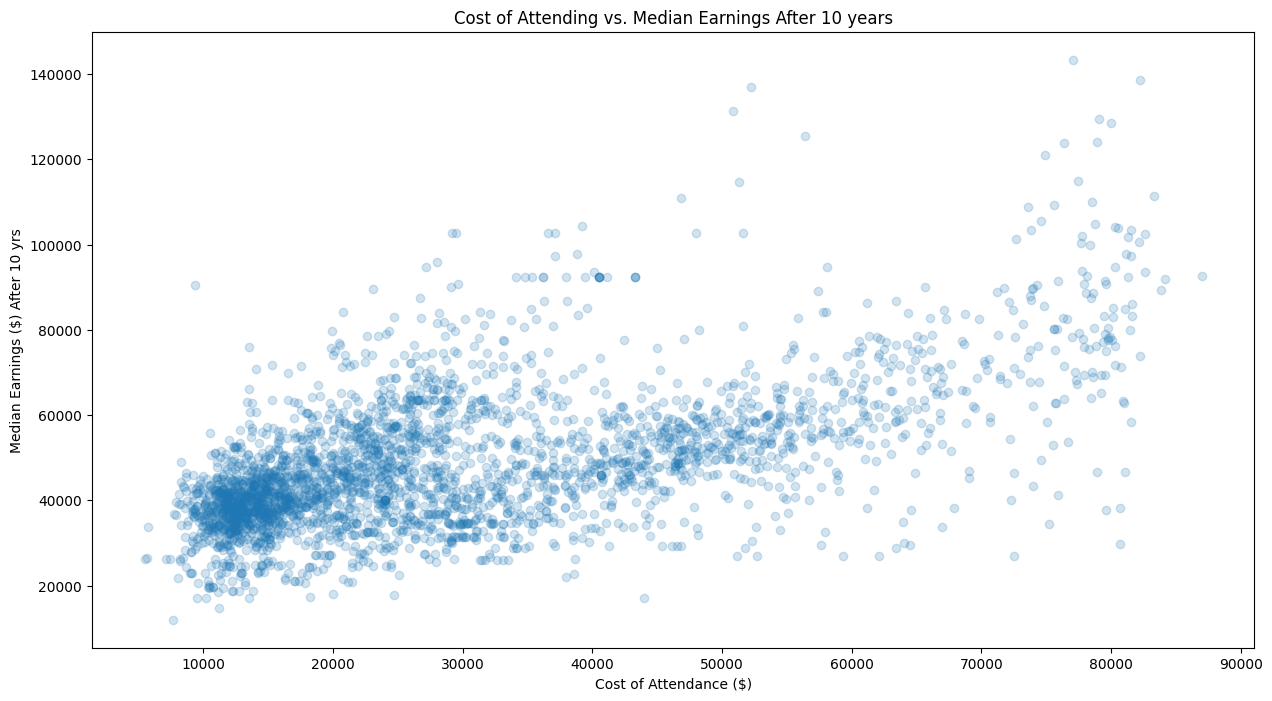

In [34]:
# Method 1: Using Matplotlib
plt.figure(figsize=(15,8))
plt.title('Cost of Attending vs. Median Earnings After 10 years')
plt.xlabel('Cost of Attendance ($)')
plt.ylabel('Median Earnings ($) After 10 yrs')
plt.scatter(df_college['Cost'], df_college['median_earnings_10yrs'], alpha=0.2)


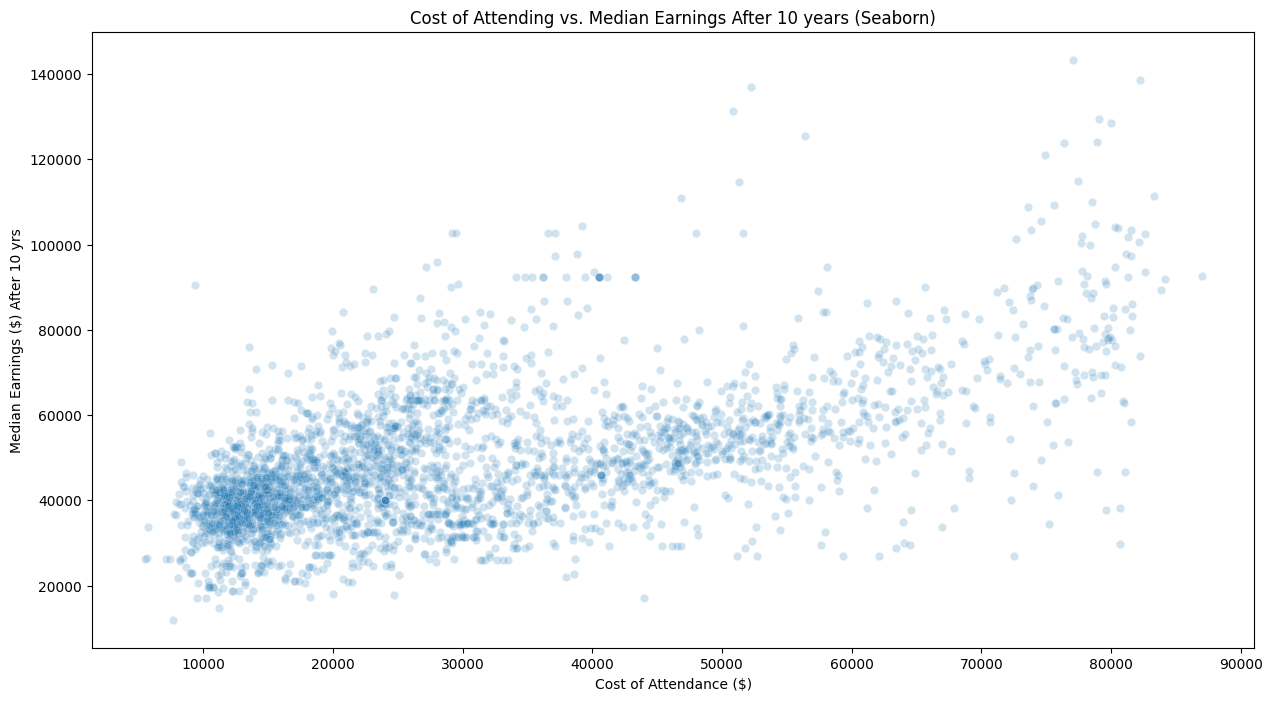

In [35]:
#Method 2: Using Seaborn
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_college, x="Cost", y="median_earnings_10yrs", alpha=0.2)
plt.title('Cost of Attending vs. Median Earnings After 10 years (Seaborn)')
plt.xlabel('Cost of Attendance ($)')
plt.ylabel('Median Earnings ($) After 10 yrs')
plt.show()

**How It Works**

1. We load the dataset and rename columns to make them easier to work with.

2. We use .dropna() to ensure clean data.

3. Matplotlib gives us full control over plot layout.

4. Seaborn makes it easier to generate aesthetically pleasing plots quickly.



#Recipe 3: How to Analyze Listening Patterns with Timestamps

**What This Does**

This recipe shows how to analyze when you listen to music using timestamp data from Spotify. It counts how often you streamed by hour of the day and day of the week.





In [36]:
import pandas as pd

In [37]:
from google import colab
uploaded = colab.files.upload()

Saving timestamps (2).csv to timestamps (2).csv


In [38]:
df_timestamps = pd.read_csv('timestamps (2).csv')

In [39]:
df_timestamps.head()

,ts
0,2024-01-09T15:29:14Z
1,2024-01-09T15:32:04Z
2,2024-01-09T15:32:37Z
3,2024-01-09T15:33:01Z
4,2024-01-09T15:39:17Z


In [41]:
# Convert timestamp to datetime
df_timestamps['endTime'] = pd.to_datetime(df_timestamps['ts'])


In [42]:
# Extract hour and day of week
df_timestamps['hour'] = df_timestamps['endTime'].dt.hour
df_timestamps['day_of_week'] = df_timestamps['endTime'].dt.day_name()


In [44]:
df_timestamps.columns

Index(['ts', 'endTime', 'hour', 'day_of_week'], dtype='object')

In [45]:
# Count plays per hour
hourly_counts = df_timestamps['hour'].value_counts().sort_index().reset_index()
hourly_counts.columns = ['hour', 'track_count']


In [46]:
# Count plays per day
daily_counts = df_timestamps['day_of_week'].value_counts().reset_index()
daily_counts.columns = ['day_of_week', 'track_count']


In [47]:
# Display summaries
print(hourly_counts)
print(daily_counts)

    hour  track_count
0      0         1002
1      1          919
2      2          898
3      3          816
4      4          593
5      5          583
6      6          520
7      7          317
8      8          161
9      9           86
10    10          122
11    11          117
12    12          116
13    13          117
14    14          176
15    15          209
16    16          227
17    17          496
18    18          615
19    19          663
20    20          594
21    21          652
22    22          779
23    23          807
  day_of_week  track_count
0      Monday         2229
1    Saturday         1841
2      Sunday         1758
3     Tuesday         1555
4   Wednesday         1553
5    Thursday         1415
6      Friday         1234


**How It Works**

1. ts is your original timestamp → converted to endTime for clarity.

2. .dt.hour and .dt.day_name() let us analyze temporal behavior.

3. value_counts() tells you how many tracks you listened to during each hour or on each weekday.

4. You can also use this data to build bar charts if you want to visualize your habits.



#Recipe 4: How to Rank Top Schools by Earnings

**What This Does**

This recipe shows how to find the top 10 colleges with the highest median earnings 10 years after enrollment using two different Pandas methods: .sort_values() and .nlargest() from the U.S college_scorecard_2024-1.csv



In [48]:
# Load the dataset
df_college = pd.read_csv("college_scorecard_2024-1.csv", low_memory=False)


In [49]:
# Rename columns for easier access
df_college = df_college.rename(columns={
    "INSTNM": "college_name",
    "MD_EARN_WNE_P10": "median_earnings_10yrs"
})

In [50]:
# Drop rows with missing values
df_college = df_college.dropna(subset=["median_earnings_10yrs"])


In [51]:
#Method 1: Using sort_values()
top10_sorted = df_college.sort_values(by="median_earnings_10yrs", ascending=False).head(10)
print("Top 10 colleges by earnings (using sort_values):")
print(top10_sorted[["college_name", "median_earnings_10yrs"]])


Top 10 colleges by earnings (using sort_values):
                                           college_name  median_earnings_10yrs
1436              Massachusetts Institute of Technology               143372.0
408                           Samuel Merritt University               143238.0
2827       Philadelphia College of Osteopathic Medicine               138767.0
300                                 Harvey Mudd College               138687.0
1764  University of Health Sciences and Pharmacy in ...               137047.0
1987     Albany College of Pharmacy and Health Sciences               131426.0
4362             Franklin W Olin College of Engineering               129455.0
190                  California Institute of Technology               128566.0
1434                                   MCPHS University               125557.0
3630                                Stanford University               124080.0


In [52]:
#Method 2: Using nlargest()
top10_nlargest = df_college.nlargest(10, "median_earnings_10yrs")
print("\nTop 10 colleges by earnings (using nlargest):")
print(top10_nlargest[["college_name", "median_earnings_10yrs"]])



Top 10 colleges by earnings (using nlargest):
                                           college_name  median_earnings_10yrs
1436              Massachusetts Institute of Technology               143372.0
408                           Samuel Merritt University               143238.0
2827       Philadelphia College of Osteopathic Medicine               138767.0
300                                 Harvey Mudd College               138687.0
1764  University of Health Sciences and Pharmacy in ...               137047.0
1987     Albany College of Pharmacy and Health Sciences               131426.0
4362             Franklin W Olin College of Engineering               129455.0
190                  California Institute of Technology               128566.0
1434                                   MCPHS University               125557.0
3630                                Stanford University               124080.0


**How It Works**

1. We start by selecting only the columns we need (college_name and median_earnings_10yrs) and dropping any rows where earnings data is missing.

2. Method 1 uses .sort_values() to sort the entire dataset by earnings in descending order, then takes the top 10 using .head(10).

3. Method 2 uses .nlargest(), a simpler, more direct method to grab the 10 rows with the highest values in a specific column.

4. Both methods give you the same result, it just depends on your preferred coding style or use case.

